<a href="https://colab.research.google.com/github/19521242bao/CS117_FinalProject/blob/main/CS117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import các thư viện cần sử dụng

In [1]:
!pip install underthesea

     |████████████████████████████████| 7.5 MB 4.4 MB/s 
     |████████████████████████████████| 1.3 MB 39.3 MB/s 
     |████████████████████████████████| 743 kB 27.4 MB/s 
     |████████████████████████████████| 241 kB 52.6 MB/s 
     |████████████████████████████████| 753.2 MB 12 kB/s 
     |████████████████████████████████| 43 kB 1.3 MB/s 
     |████████████████████████████████| 2.9 MB 38.0 MB/s 
     |████████████████████████████████| 1.1 MB 41.0 MB/s 
     |████████████████████████████████| 895 kB 48.2 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=8a1f799c8acf6d1a58f4bf46ba0b300cd8af878f5c98aa0948554cf32bd4c367
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
ERROR: pip's dependency resol

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import underthesea
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

## Dowload dữ liệu từ git của nhóm

In [3]:
!gdown --id 1zo7CHRR2T4irW-zsl580jcyzuh3HBnNV

Downloading...
From: https://drive.google.com/uc?id=1zo7CHRR2T4irW-zsl580jcyzuh3HBnNV
To: /content/CS117_data.csv
100% 1.43M/1.43M [00:00<00:00, 95.6MB/s]


In [4]:
dataset=pd.read_csv("CS117_data.csv")

In [47]:
dataset[]

0     Thấm nhanh, thơm, còn lại thì phải chờ thời gi...
1     Mua tặng bx. Gọn nhẹ, màn oled đẹp, cam đỉnh. ...
2          Ốp đẹp lắmmmmmmmmmmmmmmmm ạ.................
3     Mình mua ốp trong suốt này của shop mấy lần rồ...
4     Đóng gói sản phẩm rất tệ lọ bị chảy ra nhiều.H...
5                    không đòi hỏi cao, khá cầu kì, tạm
6     Tuyệt vời, máy mướt mườn mượt, sạc nhanh 100% ...
7     Sản phẩm khá tốt trong tầm, màn hình ổn với nh...
8     Máy rất ok. Màn hình super amoled rất đẹp. Chi...
9     Chất lượng sản phẩm tuyệt vời, ốp dùng tiện íc...
10    ủng hộ dài dài, nhân viên thế giới di động xin...
11    Sau 1 tuần sử dụng thì máy xài ổn . Pin trâu ....
12                Đóng gói chắc chắn, giao hàng \nnhanh
13    Shop giao hang nhanh\nSản phẩm rất chất lượng ...
14    Hàng về... ship khá nhanh... thơm lắm... mùi k...
15    Giao hàng nhanh đóng gói cẩn thận, chất kuowng...
16    Nhân viên tư vấn nhiệt tình.Mới mua xài mấy hô...
17    Rất rất tệ,tệ hơn chữ tệ,không có gì tệ bằ

In [5]:
dataset['label'].value_counts()

 1.0    5538
 0.0    1598
-1.0    1361
Name: label, dtype: int64

In [6]:
X_data=dataset['text']
Y_data=dataset['label']

##Phân phối các lớp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


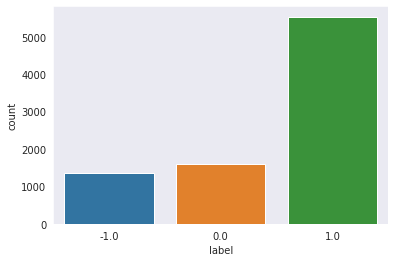

In [7]:
import seaborn as sns
sns.set_style("dark")
sns.countplot(dataset.label)

# Tiền xử lý dữ liệu

In [8]:
#Đưa về kiểu chữ thường
def text_lowercase(text):
    return text.lower()

In [9]:
#Loại bỏ các con số
def remove_number(text):
    result = re.sub(r'\d+', '', text) 
    return result

In [10]:
#Loại bỏ các dấu câu
def remove_punctuation(text):
    text = text.replace(",", " ").replace(".", " ") \
    .replace(";", " ").replace("“", " ") \
    .replace(":", " ").replace("”", " ") \
    .replace('"', " ").replace("'", " ") \
    .replace("!", " ").replace("?", " ") \
    .replace("-", " ").replace("?", " ")  
    return text

In [12]:
#Loại bỏ khoảng trắng thừa
def remove_whitespace(text): 
    return  " ".join(text.split())

In [11]:
# Bỏ bớt các chữ cái giống nhau liên tiếp( Vd: quaaa -> qua)
def remove_similarletter(text):
    text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), text, flags=re.IGNORECASE)
    return text

In [13]:
#Tách từ tiếng Việt sử dụng thư viện underthesea có sẵn
def VN_Tokenize(text,format='text'):
  return underthesea.word_tokenize(text)

In [14]:

!gdown --id 1buHsfg9uC70tuUNe852UBCZxcqFg4re5
#tải stopword

Downloading...
From: https://drive.google.com/uc?id=1buHsfg9uC70tuUNe852UBCZxcqFg4re5
To: /content/vietnamese-stopwords-dash (1).txt
100% 14.8k/14.8k [00:00<00:00, 29.9MB/s]


In [15]:
#Loại bỏ các stopwords tiếng Việt sử dụng bộ stopwords có sẵn lấy từ
def remove_VN_stopwords(text):
    file_stopwords = pd.read_csv("vietnamese-stopwords-dash (1).txt", encoding = 'UTF-8')
    file_stopwords.columns = ["Stop_words"]

    VN_stopword = []
    for i in file_stopwords["Stop_words"]:
        VN_stopword.append(i)
        
    text_token = VN_Tokenize(text)
    result = [word for word in text_token if word not in VN_stopword]
    return " ".join(result)

In [16]:
#Chuẩn hóa dữ liệu
def Util(text):
    replace_list = {
        'ship': 'vận chuyển', 'shop': 'cửa hàng', 'sho': 'cửa hàng', 'm': 'mình','mk':'mình','mjk':'mình', 'mik': 'mình', 'ko': 'không' , 'k': 'không', 'kh': 'không', 'khong': 'không', 'kg': 'không', 'khg': 'không','hok':'không','hong':'không', 'tl': 'trả lời',
        'rep': 'trả lời', 'r': 'rồi', 'fb': 'facebook', 'face': 'faceook', 'thanks': 'cảm ơn', 'thank': 'cảm ơn', 'tks': 'cảm ơn', 'tk': 'cảm ơn', 'ok': 'tốt', 'oki': 'tốt', 'okie': 'tốt', 'sp': 'sản phẩm',
        'dc': 'được','đc':'được','dk':'được', 'vs': 'với', 'đt': 'điện thoại', 'thjk': 'thích', 'thik': 'thích', 'qá': 'quá', 'trể': 'trễ', 'bgjo': 'bao giờ', 'h': 'giờ', 'qa': 'quá', 'dep': 'đẹp', 'xau': 'xấu', 'ib': 'nhắn tin',
        'cute': 'dễ thương', 'sz': 'size', 'good': 'tốt', 'god': 'tốt', 'bt': 'bình thường','tr':'triệu','dag':'đang','nhiu':'nhiêu','mn':'mọi người','m.n':'mọi người','ac':'anh chị','sag':'sang','s':'sao',
        'sz': 'cỡ', 'size': 'cỡ', 'đx': 'được', 'dk': 'được', 'dc': 'được', 'đk': 'được','ae':'anh em','j':'gì','hnay':'hôm nay','lm':'làm','ktra':'kiểm tra','sp':'sản phẩm','zô':'vào',
        'đc': 'được', 'authentic': 'chuẩn chính hãng', 'aut': 'chuẩn chính hãng', 'auth ': 'chuẩn chính hãng', 'thick': 'thích','v':'vậy','cng':'cũng','cg':'cũng','ns':'nói','nv':'nhân viên',
        'gud': 'tốt', 'god': 'tốt', 'wel done': 'tốt', 'good': 'tốt', 'gút': 'tốt','ng':'người','chs':'chơi','mng':'mọi người','wa':'quá',
        'sấu': 'xấu', 'gut': 'tốt', 'tot': 'tốt', 'nice': 'tốt', 'perfect': 'rất tốt','trc':'trước',
        'time': 'thời gian', 'qá': 'quá','nc':'nói chung','ace':'anh chị em',
        'product': 'sản phẩm', 'quality': 'chất lượng', 'chat': 'chất' , 'excelent': 'hoàn hảo', 'bad': 'tệ', 'sad': 'tệ',
        'beautiful': 'đẹp', 'tl': 'trả lời', 'r': 'rồi', 'order': 'đặt hàng',
        'chất lg': 'chất lượng', 'sd': 'sử dụng', 'dt': 'điện thoại', 'nt': 'nhắn tin', 'tl': 'trả lời', 'sài': 'xài', 'bjo': 'bao giờ',
        'thik': 'thích', 'sop': 'cửa hàng', 'fb': 'facebook', 'face': 'facebook', 'very': 'rất',
        'dep': 'đẹp', 'xau': 'xấu','tgdđ':'thế giới di động','tgdd':'thế giới di động','đmx':'điện máy xanh',
        'iu': 'yêu', 'fake': 'giả mạo', 'trl': 'trả lời', '><': 'tiêu cực',
        'por': 'tệ', 'poor': 'tệ', 'ib': 'nhắn tin', 'rep': 'trả lời', 'fback': 'feedback', 'fedback': 'feedback',
        'bin': 'pin', 'cx': 'cũng', 'nch': 'nói chuyện', 'ntn': 'như thế nào', 'vde': 'vấn đề'
    }
    text = text.split()
    len_ = len(text)
    for i in range(0, len_):    
      for k, v in replace_list.items():
        if (text[i]==k):
          text[i] = v
    return " ".join(text)

In [17]:
def Text_PreProcessing_noutil(data):
  result_1 = []
  for i in data:
    i = str(i)
    text = text_lowercase(i)
    text = Util(text)
    text = remove_similarletter(text)
    text = remove_number(text)
    text = remove_punctuation(text)
    text = remove_whitespace(text)
    text = remove_VN_stopwords(text)
    result_1.append(text)
  return result_1

In [18]:
X_data_1 = X_data
Y_data_1 = Y_data

In [19]:
X_data

0       Thấm nhanh, thơm, còn lại thì phải chờ thời gi...
1       Mua tặng bx. Gọn nhẹ, màn oled đẹp, cam đỉnh. ...
2            Ốp đẹp lắmmmmmmmmmmmmmmmm ạ.................
3       Mình mua ốp trong suốt này của shop mấy lần rồ...
4       Đóng gói sản phẩm rất tệ lọ bị chảy ra nhiều.H...
                              ...                        
8492    Điện thoại mình mua được 1 tuần rồi,thật sự th...
8493    Tốt sài ok ,mua tại thế giới d đ gò dầu ,tây n...
8494    sản phẩm rất ok và chất lượng giao hàng nhanh ...
8495    mình mới mua dc 1 tuần .sáng nay máy báo k có ...
8496    Điện thoại sài mượt mà , chụp ảnh đẹp, chơi ga...
Name: text, Length: 8497, dtype: object

In [20]:
X_data_1 = Text_PreProcessing_noutil(X_data_1)

# Feature Extraction

In [21]:
vectorizer_1 = TfidfVectorizer()
vectorizer_1.fit(X_data_1)
X_data_tfidf_1 = vectorizer_1.transform(X_data_1).toarray()

In [ ]:
print(X_train_1)
print(X_data_tfidf_1.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(8497, 6356)


# Phân chia tập train và test

In [22]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_data_tfidf_1, Y_data_1, test_size=0.3)

# Huấn luyện mô hình và đánh giá kết quả

In [ ]:
model_1 = SVC(kernel='linear')
model_1.fit(X_train_1, Y_train_1)
print("Model SVC")
print("Train score: ", model_1.score(X_train_1, Y_train_1))
print("Test score: ", model_1.score(X_test_1, Y_test_1))
y_pred_1 = model_1.predict(X_test_1)
print("F1 score: ",f1_score(Y_test_1, y_pred_1, average = 'macro'))

KeyboardInterrupt: ignored

In [25]:
#đoạn code thể hiện confusion matrix lấy từ : https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python?fbclid=IwAR2gosLkbym_WUq8o9ZgHmOxzn9nZUUfrHN5cLQxWCvZKq9BDLR_qr_f9qA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
  


In [23]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[-1, 0, 1],
                      title='Confusion matrix, without normalization')

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:

print(classification_report(Y_test_1, y_pred_1, target_names=['-1', '0', '1']))

NameError: ignored

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [27]:
modelnb = MultinomialNB()
modelnb.fit(X_train_1, Y_train_1)
print("Model MultinomialNB")
print("Train score: ", modelnb.score(X_train_1, Y_train_1))
print("Test score: ", modelnb.score(X_test_1, Y_test_1))
y_pred_nb = modelnb.predict(X_test_1)
print("F1 score: ",f1_score(Y_test_1, y_pred_nb, average = 'macro'))

Model MultinomialNB
Train score:  0.7918278123423574
Test score:  0.7537254901960785
F1 score:  0.5945143657560341


Confusion matrix, without normalization
[[ 195   29  182]
 [  28  103  360]
 [   6   23 1624]]
              precision    recall  f1-score   support

          -1       0.85      0.48      0.61       406
           0       0.66      0.21      0.32       491
           1       0.75      0.98      0.85      1653

    accuracy                           0.75      2550
   macro avg       0.76      0.56      0.59      2550
weighted avg       0.75      0.75      0.71      2550



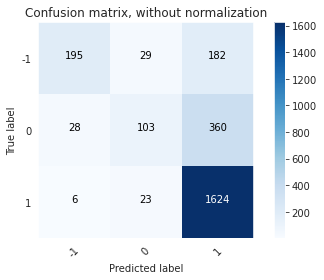

In [28]:
cnf_matrix_nb = confusion_matrix(Y_test_1, y_pred_nb, labels=[-1, 0, 1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_nb, classes=[-1, 0, 1],
                      title='Confusion matrix, without normalization')
print(classification_report(Y_test_1, y_pred_nb, target_names=['-1', '0', '1']))

In [29]:
modellr = LogisticRegression()
modellr.fit(X_train_1, Y_train_1)
print("Model LogisticRegression")
print("Train score: ", modellr.score(X_train_1, Y_train_1))
print("Test score: ", modellr.score(X_test_1, Y_test_1))
y_pred_lr = modellr.predict(X_test_1)
print("F1 score: ",f1_score(Y_test_1, y_pred_lr, average = 'macro'))

Model LogisticRegression
Train score:  0.8780897931730284
Test score:  0.7984313725490196
F1 score:  0.7016780784343748


In [ ]:
cnf_matrix_lr = confusion_matrix(Y_test_1, y_pred_lr, labels=[-1, 0, 1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes=[-1, 0, 1],
                      title='Confusion matrix, without normalization')

In [ ]:
print(classification_report(Y_test_1, y_pred_lr, target_names=['-1', '0', '1']))

In [ ]:
modelrdf = RandomForestClassifier(n_estimators=10)
modelrdf.fit(X_train_1, Y_train_1)
print("Model RandomForestClassifier")
print("Train score: ", modelrdf.score(X_train_1, Y_train_1))
print("Test score: ", modelrdf.score(X_test_1, Y_test_1))
y_pred_rdf = modelrdf.predict(X_test_1)
print("F1 score: ",f1_score(Y_test_1, y_pred_rdf, average = 'macro'))

In [ ]:
cnf_matrix_rdf = confusion_matrix(Y_test_1, y_pred_rdf, labels=[-1, 0, 1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_rdf, classes=[-1, 0, 1],
                      title='Confusion matrix, without normalization')

In [ ]:
print(classification_report(Y_test_1, y_pred_rdf, target_names=['-1', '0', '1']))

# Dự đoán kết quả

In [33]:
import joblib
joblib.dump(vectorizer_1, 'tf_idf.pkl')
#joblib.dump(modellr, "bestmodel.pkl")

['tf_idf.pkl']

In [ ]:
model_1

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
!pip install pyvi

     |████████████████████████████████| 8.5 MB 4.5 MB/s 


In [83]:
#!wget https://github.com/ThuanPhong0126/CS114.K21/blob/master/Project/tfidf_pyvi.pkl?raw=true
# !wget https://github.com/ThuanPhong0126/CS114.K21/blob/master/Project/model_SVC.sav?raw=true

#!pip install pyvi
import joblib
import pandas as pd
from pyvi import ViTokenizer

def Token(t):
  return ViTokenizer.tokenize(t)

def standardize_data(t):

  t = t.lower()
  t = t.replace(',', ' ').replace('.', ' ')\
      .replace(";", " ").replace("“", " ") \
      .replace(":", " ").replace("”", " ") \
      .replace('"', " ").replace("'", " ") \
      .replace("!", " ").replace("?", " ").replace("-", " ").replace("?", " ") 
  t = t.strip()
  return t

def du_doan(comment):
  emb_loaded=joblib.load('tf_idf.pkl')
  model_loaded=joblib.load('bestmodel.pkl')
  comment=comment.strip()
  print(comment)
  feature=pd.Series(comment.split('.'))
  comment=feature
  feature = feature.apply(standardize_data)
  feature=emb_loaded.transform(feature).toarray()
  #print(feature.shape)
  predict=model_loaded.predict(feature)
  
  if predict==1:
      return ("Bình luận tốt về sản phẩm")
  if predict==0:
      return ("Bình luận không liên quan hoặc trung tính về sản phẩm")
  if predict==-1:
      return ("Bình luận kém về sản phẩm")
  

In [78]:
!pip install gradio

     |████████████████████████████████| 3.4 MB 5.0 MB/s 
     |████████████████████████████████| 206 kB 44.8 MB/s 
     |████████████████████████████████| 1.9 MB 36.4 MB/s 
     |████████████████████████████████| 3.2 MB 34.0 MB/s 
     |████████████████████████████████| 961 kB 17.9 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=735872d93cf58850dc8ea0da0c177bf859f64572a5ab88da2e5ab397b17a4c10
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=71744337dc5cd62a25988bff18fcdf2553768e24e1750a46bc35225aec997acd
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [84]:
import gradio as gr

In [88]:

# Define Gradio interface
gradio_ui = gr.Interface(
    fn=du_doan,
    title="Phân tích cảm xúc bình luận sản phẩm",
    description="Nhập câu bình luận về sản phâm",
    inputs=gr.inputs.Textbox(lines=1, label="Paste tweet text here"),
    outputs=gr.outputs.Textbox(label="Chất lượng sản phẩm"),
)

In [90]:
gradio_ui.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://30680.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7863/',
 'https://30680.gradio.app')